In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as ss
import matplotlib.pyplot as pic
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import norm,skew
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
#Loading Data
HousingPrice_Train = pd.read_csv("D:/Analytics/UCF/Machine Learning/Project/Mine/HousingPrice_Train.csv")
HousingPrice_Test = pd.read_csv("D:/Analytics/UCF/Machine Learning/Project/Mine/HousingPrice_Test.csv")

In [3]:
#Viewing Data
print(HousingPrice_Train.head())
print()
print()
print(HousingPrice_Test.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
#Number of Rows and Columns
print ('The train data has {0} rows and {1} columns'.format(HousingPrice_Train.shape[0],HousingPrice_Train.shape[1]))
print ('----------------------------')
print ('The test data has {0} rows and {1} columns'.format(HousingPrice_Test.shape[0],HousingPrice_Test.shape[1]))

The train data has 1460 rows and 81 columns
----------------------------
The test data has 1459 rows and 80 columns


In [5]:
#Number of Numeric and Categorical Columns
print ("There are {} numeric and {} categorical columns in train data".format(HousingPrice_Train.select_dtypes(include=[np.number]).shape[1],HousingPrice_Train.select_dtypes(exclude=[np.number]).shape[1]))
print ('----------------------------')
print ("There are {} numeric and {} categorical columns in test data".format(HousingPrice_Test.select_dtypes(include=[np.number]).shape[1],HousingPrice_Test.select_dtypes(exclude=[np.number]).shape[1]))

There are 38 numeric and 43 categorical columns in train data
----------------------------
There are 37 numeric and 43 categorical columns in test data


In [6]:
#Summary of Train Data
HousingPrice_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
#Summary of Test Data
HousingPrice_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [8]:
#Save the 'Id' column
train_ID = HousingPrice_Train['Id']
test_ID = HousingPrice_Test['Id']

# Exploratory Data Analysis (EDA)

### 1. Target Variable - SalePrice

In [9]:
#Summary of Target Variable
HousingPrice_Train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The Skewness of SalePrice is 1.8828757597682129
The Kurtosis of SalePrice is 6.536281860064529


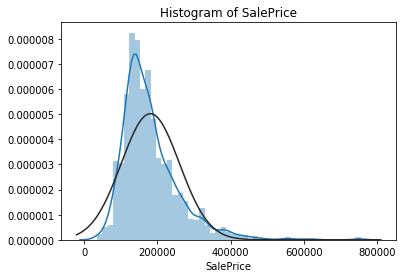

In [10]:
#Distribution of Target Variable
ss.distplot(HousingPrice_Train['SalePrice'], fit=norm).set(title="Histogram of SalePrice");
print ("The Skewness of SalePrice is {}".format(HousingPrice_Train['SalePrice'].skew()))
print("The Kurtosis of SalePrice is {}".format(str(HousingPrice_Train['SalePrice'].kurt())))

The Skewness of log transformed SalePrice is 0.12133506220520406
The Kurtosis of log transformed SalePrice is 0.8095319958036296


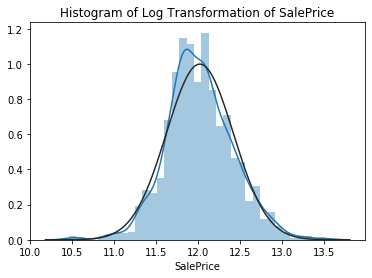

In [11]:
#Let's log transform this variable 
trans_Sale = np.log(HousingPrice_Train['SalePrice'])
ss.distplot(trans_Sale,fit=norm).set(title="Histogram of Log Transformation of SalePrice");
print ("The Skewness of log transformed SalePrice is {}".format(trans_Sale.skew()))
print("The Kurtosis of log transformed SalePrice is {}".format(str(trans_Sale.kurt())))

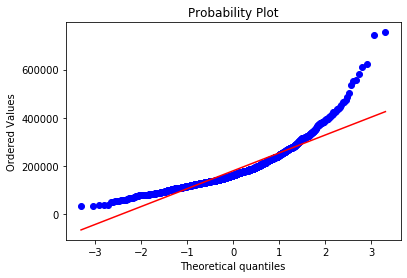

In [12]:
#QQ-plot of Target Variable
res = stats.probplot(HousingPrice_Train['SalePrice'], plot=pic)
pic.show()

### 2.Observations from Numeric and Categorical Variables

In [13]:
Num_data = HousingPrice_Train.select_dtypes(include=[np.number])
Catg_data = HousingPrice_Train.select_dtypes(exclude=[np.number])

In [14]:
print("Numeric data coulumns are ", Num_data.shape[1])
print()
print("Those are ", Num_data.columns )

Numeric data coulumns are  38

Those are  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [15]:
print("Categorical data coulumns are ", Catg_data.shape[1])
print()
print("Those are ", Catg_data.columns )

Categorical data coulumns are  43

Those are  Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [16]:
#Summary of Numeric Data
display(Num_data.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [17]:
#Summary of Categorical Data
display(Catg_data.describe().transpose())

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [18]:
del Num_data['Id']

### 3. Correlation - To check for multicollinearity

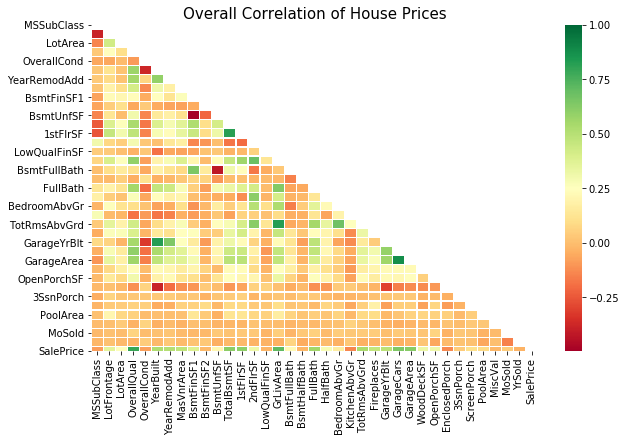

In [19]:
corr = Num_data.corr()
half = np.zeros_like(corr, dtype=np.bool)
half[np.triu_indices_from(half)] = True
pic.figure(figsize=(10, 6))
pic.title('Overall Correlation of House Prices', fontsize=15)
ss.heatmap(corr, mask=half, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':12})
pic.show()

In [20]:
#Numeric Correlation Score
print("The Top 15 varaibles highly correlated with SalePrice")
print (corr['SalePrice'].sort_values(ascending=False)[:15], '\n') 
print ('----------------------')
print()
print("The Top 5 varaibles negatively correlated with SalePrice")
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

The Top 15 varaibles highly correlated with SalePrice
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 

----------------------

The Top 5 varaibles negatively correlated with SalePrice
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [21]:
#Attributes pairs whose correlation values are more than 0.6
col = Num_data.columns
for i in range(len(col)):
    for j in range(i + 1, len(col)):
        attr01 = col[i];
        attr02 = col[j];
        if corr[attr01][attr02] > 0.6:
            print("%s, %s: %.2f" % (attr01, attr02, corr[attr01][attr02] * 100))

OverallQual, GarageCars: 60.07
OverallQual, SalePrice: 79.10
YearBuilt, GarageYrBlt: 82.57
YearRemodAdd, GarageYrBlt: 64.23
BsmtFinSF1, BsmtFullBath: 64.92
TotalBsmtSF, 1stFlrSF: 81.95
TotalBsmtSF, SalePrice: 61.36
1stFlrSF, SalePrice: 60.59
2ndFlrSF, GrLivArea: 68.75
2ndFlrSF, HalfBath: 60.97
2ndFlrSF, TotRmsAbvGrd: 61.64
GrLivArea, FullBath: 63.00
GrLivArea, TotRmsAbvGrd: 82.55
GrLivArea, SalePrice: 70.86
BedroomAbvGr, TotRmsAbvGrd: 67.66
GarageCars, GarageArea: 88.25
GarageCars, SalePrice: 64.04
GarageArea, SalePrice: 62.34


### 4.Check some variables in detail

In [22]:
HousingPrice_Train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

             SalePrice
OverallQual           
1                50150
2                60000
3                86250
4               108000
5               133000
6               160000
7               200141
8               269750
9               345000
10              432390



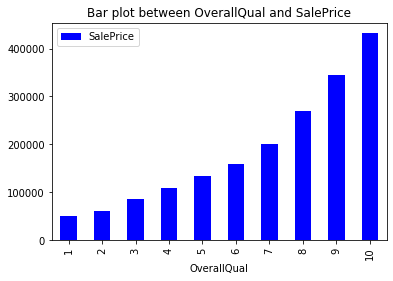

In [23]:
#The overall quality is measured on a scale of 1 to 10. 
OverallQual_Detail = HousingPrice_Train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
print(OverallQual_Detail)
print()
OverallQual_Detail.plot(kind='bar', color='blue').set(title = "Bar plot between OverallQual and SalePrice");

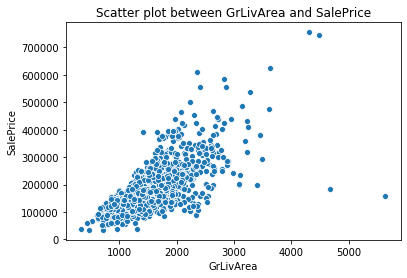

In [24]:
#Let's visualize variable GrLivArea and understand their behavior.
ss.scatterplot(x=HousingPrice_Train['GrLivArea'], y=HousingPrice_Train['SalePrice']).set(title="Scatter plot between GrLivArea and SalePrice");

               SalePrice
SaleCondition           
Abnorml           130000
AdjLand           104000
Alloca            148145
Family            140500
Normal            160000
Partial           244600



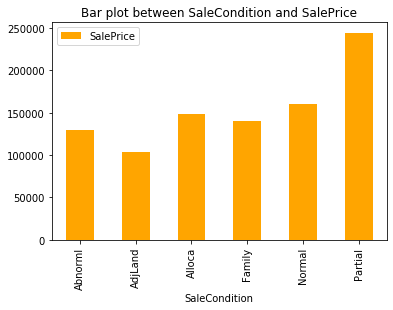

In [25]:
#SaleCondition explains the condition of sale. 
SaleCondition_Detail = HousingPrice_Train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
print(SaleCondition_Detail)
print()
SaleCondition_Detail.plot(kind='bar',color='orange').set(title = "Bar plot between SaleCondition and SalePrice");

### 5.Data Visualization

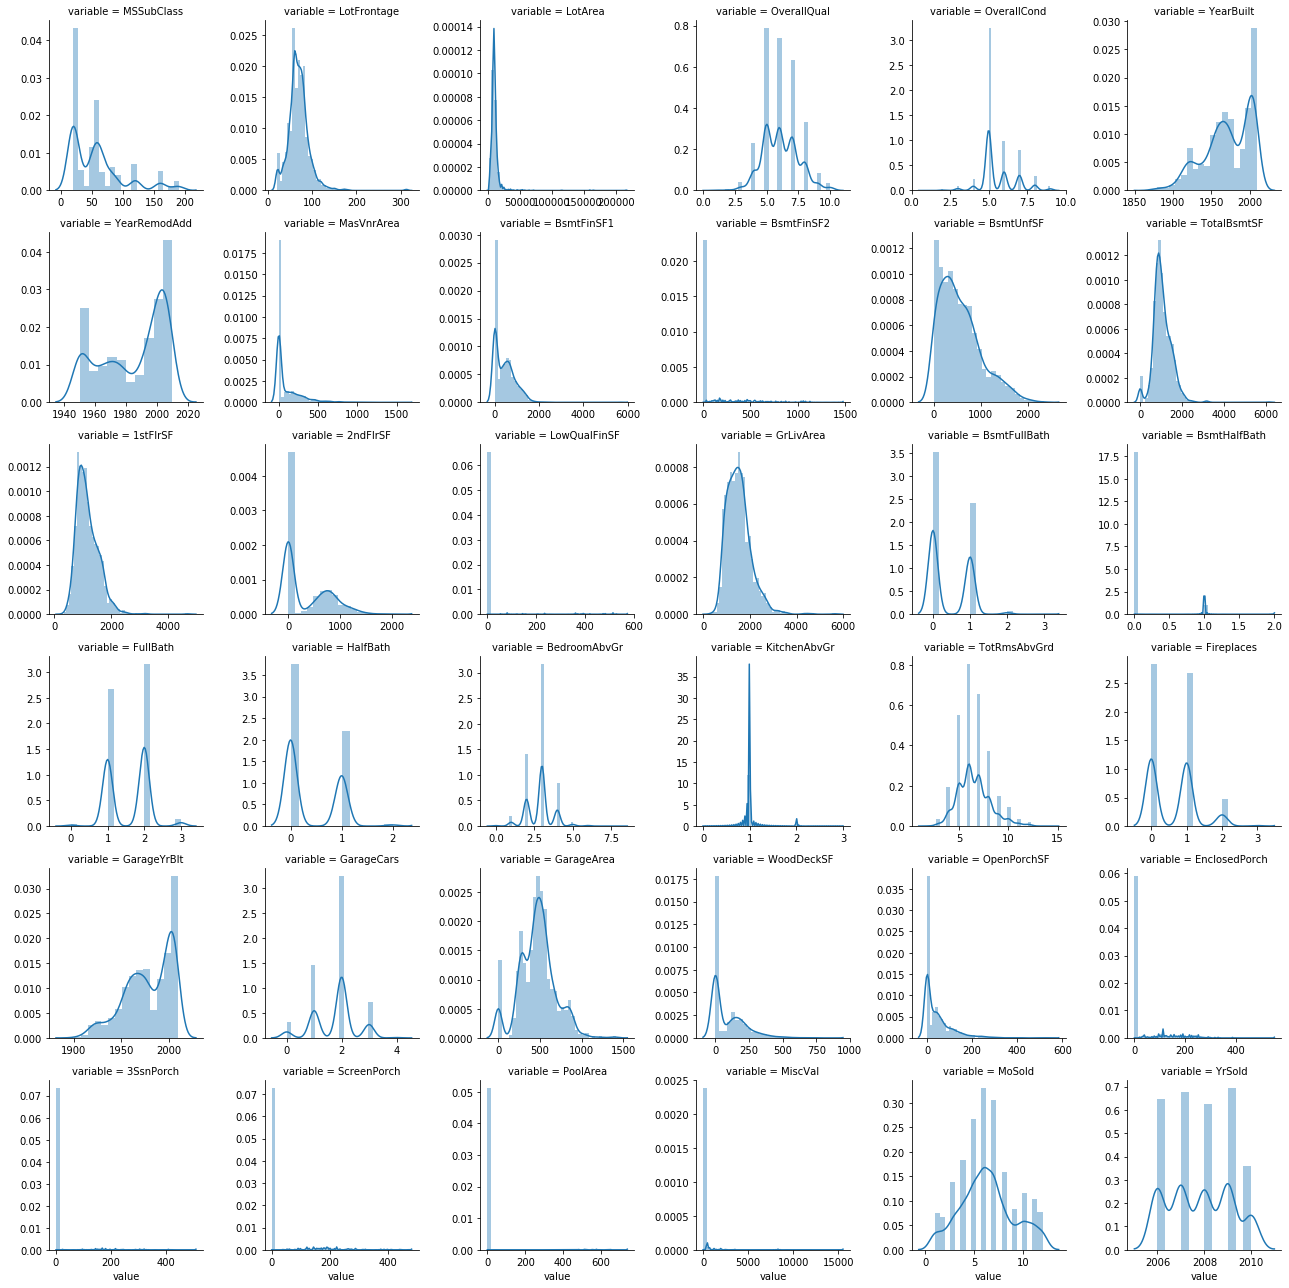

In [26]:
#Create numeric plots
num_pic = [f for f in HousingPrice_Train.columns if HousingPrice_Train.dtypes[f] != 'object']
num_pic.remove('Id')
num_pic.remove('SalePrice')
num = pd.melt(HousingPrice_Train, value_vars = num_pic)
n_p = ss.FacetGrid (num, col='variable', col_wrap=6, sharex=False, sharey = False)
n_p.map(ss.distplot, 'value');

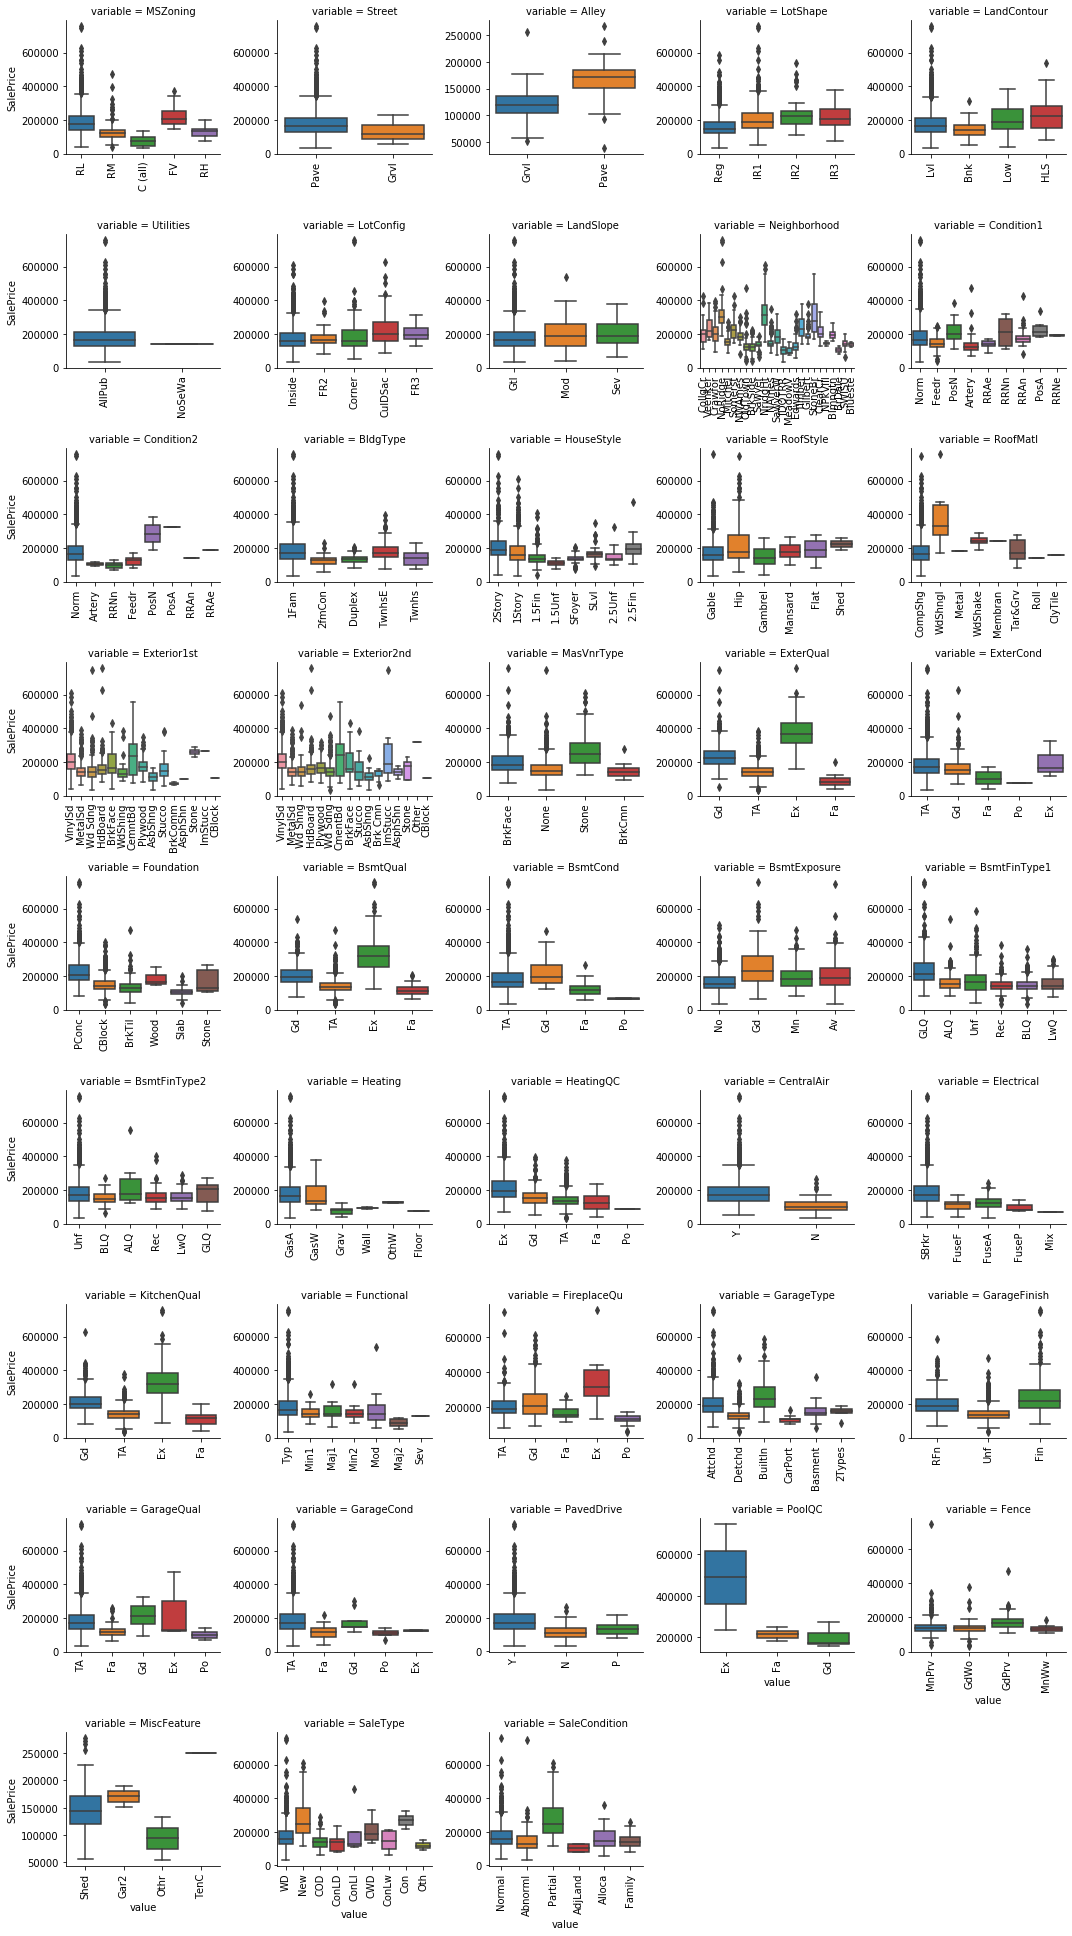

In [27]:
#boxplots for visualizing categorical variables.
def boxplot(x,y,**kwargs):
            ss.boxplot(x=x,y=y)
            x = pic.xticks(rotation=90)

catg_pic = [f for f in HousingPrice_Train.columns if HousingPrice_Train.dtypes[f] == 'object']

catg = pd.melt(HousingPrice_Train, id_vars='SalePrice', value_vars=catg_pic)
c_p = ss.FacetGrid (catg, col='variable', col_wrap=5, sharex=False, sharey=False)
c_p.map(boxplot, 'value','SalePrice');


# Data Pre-Processing

After removing outlier, the train data has 1459 rows and 81 columns



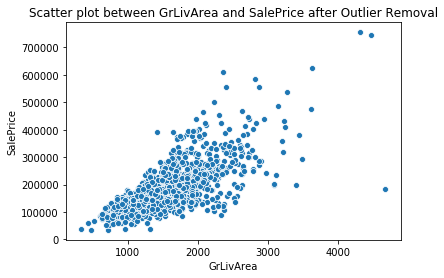

In [28]:
#Removing Outliers and plot it
HousingPrice_Train.drop(HousingPrice_Train[HousingPrice_Train['GrLivArea'] > 5000].index, inplace=True)
print ('After removing outlier, the train data has {0} rows and {1} columns'.format(HousingPrice_Train.shape[0],HousingPrice_Train.shape[1]))
print()
ss.scatterplot(x=HousingPrice_Train['GrLivArea'], y=HousingPrice_Train['SalePrice']).set(title="Scatter plot between GrLivArea and SalePrice after Outlier Removal");

In [29]:
# Saving train & test shapes
train_nrow = HousingPrice_Train.shape[0]
test_nrow = HousingPrice_Test.shape[0]

In [30]:
# Creating SalePrice variable
Sale_Data = HousingPrice_Train.iloc[:,-1]

In [31]:
Sale_Data

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1459, dtype: int64

In [32]:
#Merge train and test data to form new complete data set
whole_data = pd.concat([HousingPrice_Train, HousingPrice_Test], sort=False)

In [33]:
whole_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [34]:
print ('The whole dataset has {0} rows and {1} columns'.format(whole_data.shape[0],whole_data.shape[1]))

The whole dataset has 2918 rows and 81 columns


In [35]:
#Delete columns from the dataset
whole_data.drop(['Id'], axis=1, inplace=True)
whole_data.drop(['SalePrice'], axis=1, inplace=True)

In [36]:
#Handling Null Values
Nul_C = pd.DataFrame(whole_data.isnull().sum().sort_values(ascending=False)[:30])
Nul_P = pd.DataFrame(round(whole_data.isnull().sum().sort_values(ascending = False)/len(whole_data)*100,2)[round(whole_data.isnull().sum().sort_values(ascending = False)/len(whole_data)*100,2) != 0])
Nul_data = pd.concat([Nul_C,Nul_P],axis=1, sort=False)
Nul_data.columns = ['Null Count','Null Percent']
Nul_data.index.name = 'Feature'
Nul_data

,Null Count,Null Percent
Feature,,
PoolQC,2909.0,99.69
MiscFeature,2813.0,96.40
Alley,2720.0,93.21
Fence,2347.0,80.43
FireplaceQu,1420.0,48.66
LotFrontage,486.0,16.66
GarageCond,159.0,5.45
GarageQual,159.0,5.45
GarageYrBlt,159.0,5.45


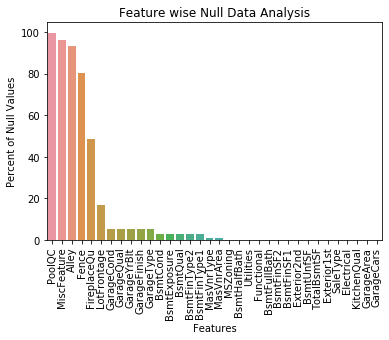

In [37]:
# Visualising null data
ss.barplot(x=Nul_data.index, y=Nul_data['Null Percent'])
pic.xticks(rotation='90')
pic.xlabel('Features')
pic.ylabel('Percent of Null Values')
pic.title('Feature wise Null Data Analysis');

In [38]:
#Data description says NA means "No"
whole_data["PoolQC"] = whole_data["PoolQC"].fillna("None")
whole_data["MiscFeature"] = whole_data["MiscFeature"].fillna("None")
whole_data["Alley"] = whole_data["Alley"].fillna("None")
whole_data["Fence"] = whole_data["Fence"].fillna("None")
whole_data["FireplaceQu"] = whole_data["FireplaceQu"].fillna("None")
whole_data["GarageType"] = whole_data["GarageType"].fillna("None")
whole_data["GarageFinish"] = whole_data["GarageFinish"].fillna("None")
whole_data["GarageQual"] = whole_data["GarageQual"].fillna("None")
whole_data["GarageCond"] = whole_data["GarageCond"].fillna("None")
whole_data["BsmtQual"] = whole_data["BsmtQual"].fillna("None")
whole_data["BsmtCond"] = whole_data["BsmtCond"].fillna("None")
whole_data["BsmtExposure"] = whole_data["BsmtExposure"].fillna("None")
whole_data["BsmtFinType1"] = whole_data["BsmtFinType1"].fillna("None")
whole_data["BsmtFinType2"] = whole_data["BsmtFinType2"].fillna("None")
whole_data["MasVnrType"] = whole_data["MasVnrType"].fillna("None")
whole_data['MSSubClass'] = whole_data['MSSubClass'].fillna("None")

In [39]:
whole_data["LotFrontage"] = whole_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [40]:
#Replacing missing data with 0
whole_data["MasVnrArea"] = whole_data["MasVnrArea"].fillna(0)
whole_data["GarageYrBlt"] = whole_data["GarageYrBlt"].fillna(0)
whole_data["GarageArea"] = whole_data["GarageArea"].fillna(0)
whole_data["GarageCars"] = whole_data["GarageCars"].fillna(0) 
whole_data["BsmtFinSF1"] = whole_data["BsmtFinSF1"].fillna(0)
whole_data["BsmtFinSF2"] = whole_data["BsmtFinSF2"].fillna(0)
whole_data["BsmtUnfSF"] = whole_data["BsmtUnfSF"].fillna(0)
whole_data["TotalBsmtSF"] = whole_data["TotalBsmtSF"].fillna(0)
whole_data["BsmtFullBath"] = whole_data["BsmtFullBath"].fillna(0)
whole_data["BsmtHalfBath"] = whole_data["BsmtHalfBath"].fillna(0)

In [41]:
#Substitute the most frequent string
whole_data['MSZoning'] = whole_data['MSZoning'].fillna(whole_data['MSZoning'].mode()[0])
whole_data['Electrical'] = whole_data['Electrical'].fillna(whole_data['Electrical'].mode()[0])
whole_data['KitchenQual'] = whole_data['KitchenQual'].fillna(whole_data['KitchenQual'].mode()[0])
whole_data['Exterior1st'] = whole_data['Exterior1st'].fillna(whole_data['Exterior1st'].mode()[0])
whole_data['Exterior2nd'] = whole_data['Exterior2nd'].fillna(whole_data['Exterior2nd'].mode()[0])
whole_data['SaleType'] = whole_data['SaleType'].fillna(whole_data['SaleType'].mode()[0])

In [42]:
whole_data["Functional"] = whole_data["Functional"].fillna("Typ")

In [43]:
whole_data = whole_data.drop(['Utilities'], axis=1)

In [44]:
whole_na = (whole_data.isnull().sum() / len(whole_data)) * 100
whole_na = whole_na.drop(whole_na[whole_na == 0].index).sort_values(ascending=False)
missing_part = pd.DataFrame({'Missing Ratio' :whole_na})
missing_part.head()

,Missing Ratio


# Feature Engineering

### 1.Transforming numerical variables that are really categorical

In [45]:
whole_data['MSSubClass'] = whole_data['MSSubClass'].apply(str)
whole_data['OverallCond'] = whole_data['OverallCond'].astype(str)
whole_data['YrSold'] = whole_data['YrSold'].astype(str)
whole_data['MoSold'] = whole_data['MoSold'].astype(str)

### 2.Transformation and Standardization of numeric variables

In [46]:
#Skewness of all numerical features
num_feat = [f for f in whole_data.columns if whole_data[f].dtype != object]

sk = whole_data[num_feat].apply(lambda x: skew(x.dropna().astype(float))).sort_values(ascending=False)
skew_data = pd.DataFrame({'Skewness': sk})

In [47]:
#Transform the numeric features using log(x + 1)
skew_data = skew_data[abs(skew_data) > 0.75]
skew_data = skew_data.index
whole_data[skew_data] = np.log1p(whole_data[skew_data])

In [48]:
#Standardize the numeric features.
Std_scale = StandardScaler()
Std_scale.fit(whole_data[num_feat])
Scaled_Num = Std_scale.transform(whole_data[num_feat])

for i, col in enumerate(num_feat):
       whole_data[col] = Scaled_Num[:,i]

### 3. Label Encoding some categorical variables that may contain information in their ordering set

In [49]:
#LabelEncoder to categorical features
from sklearn.preprocessing import LabelEncoder

cols = ('MSSubClass','MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl','OverallCond',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType','MoSold',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'YrSold', 'SaleType', 'SaleCondition')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(whole_data[c].values)) 
    whole_data[c] = lbl.transform(list(whole_data[c].values))

### 4. Adding New Feature

In [50]:
whole_data['TotalSF'] = whole_data['TotalBsmtSF'] + whole_data['1stFlrSF'] + whole_data['2ndFlrSF']

In [51]:
print ('The total data has {0} rows and {1} columns'.format(whole_data.shape[0],whole_data.shape[1]))

The total data has 2918 rows and 79 columns


In [52]:
whole_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,10,3,-0.050684,-0.102640,1,1,3,3,4,0,...,-0.064071,3,4,1,-0.189363,4,2,8,4,0.438792
1,5,3,0.573891,0.148222,1,1,3,3,2,0,...,-0.064071,3,4,1,-0.189363,7,1,8,4,-0.087622
2,10,3,0.084883,0.460053,1,1,0,3,4,0,...,-0.064071,3,4,1,-0.189363,11,2,8,4,0.727982
3,11,3,-0.290947,0.137955,1,1,0,3,0,0,...,-0.064071,3,4,1,-0.189363,4,0,8,0,0.656110
4,10,3,0.720896,0.926201,1,1,0,3,2,0,...,-0.064071,3,4,1,-0.189363,3,2,8,4,1.652320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2,4,-3.401192,-2.999248,1,1,3,3,4,0,...,-0.064071,3,4,1,-0.189363,8,0,8,4,-1.473842
1455,2,4,-3.401192,-3.042352,1,1,3,3,4,0,...,-0.064071,3,4,1,-0.189363,6,0,8,0,-1.473842
1456,5,3,2.668942,1.591301,1,1,3,3,4,0,...,-0.064071,3,4,1,-0.189363,11,0,8,0,-0.208481
1457,14,3,-0.192559,0.313328,1,1,3,3,4,0,...,-0.064071,3,2,3,5.094074,9,0,8,4,-1.179899


### 5.Divide Data into New Training and Testing Set

In [53]:
new_train = whole_data[:train_nrow]
new_test = whole_data[train_nrow:]

In [54]:
new_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,10,3,-0.050684,-0.102640,1,1,3,3,4,0,...,-0.064071,3,4,1,-0.189363,4,2,8,4,0.438792
1,5,3,0.573891,0.148222,1,1,3,3,2,0,...,-0.064071,3,4,1,-0.189363,7,1,8,4,-0.087622
2,10,3,0.084883,0.460053,1,1,0,3,4,0,...,-0.064071,3,4,1,-0.189363,11,2,8,4,0.727982
3,11,3,-0.290947,0.137955,1,1,0,3,0,0,...,-0.064071,3,4,1,-0.189363,4,0,8,0,0.656110
4,10,3,0.720896,0.926201,1,1,0,3,2,0,...,-0.064071,3,4,1,-0.189363,3,2,8,4,1.652320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,10,3,-0.192559,-0.230735,1,1,3,3,4,0,...,-0.064071,3,4,1,-0.189363,10,1,8,4,0.799760
1456,5,3,0.756566,0.770607,1,1,3,3,4,0,...,-0.064071,3,2,1,-0.189363,4,4,8,4,1.624386
1457,11,3,-0.004822,0.030489,1,1,3,3,4,0,...,-0.064071,3,0,3,6.119667,7,4,8,4,1.799436
1458,5,3,0.084883,0.172039,1,1,3,3,4,0,...,-0.064071,3,4,1,-0.189363,6,4,8,4,-0.710550


In [55]:
new_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,5,2,0.573891,0.524014,1,1,3,3,4,0,...,-0.064071,3,2,1,-0.189363,8,4,8,4,-1.454709
1,5,3,0.611312,0.927166,1,1,0,3,0,0,...,-0.064071,3,4,0,7.417135,8,4,8,4,0.116871
2,10,3,0.339178,0.866002,1,1,0,3,4,0,...,-0.064071,3,2,1,-0.189363,5,4,8,4,0.697761
3,10,3,0.497643,0.224151,1,1,0,3,4,0,...,-0.064071,3,4,1,-0.189363,8,4,8,4,0.679067
4,0,3,-1.287257,-1.132275,1,1,0,1,4,0,...,-0.064071,3,4,1,-0.189363,0,4,8,4,-0.031637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2,4,-3.401192,-2.999248,1,1,3,3,4,0,...,-0.064071,3,4,1,-0.189363,8,0,8,4,-1.473842
1455,2,4,-3.401192,-3.042352,1,1,3,3,4,0,...,-0.064071,3,4,1,-0.189363,6,0,8,0,-1.473842
1456,5,3,2.668942,1.591301,1,1,3,3,4,0,...,-0.064071,3,4,1,-0.189363,11,0,8,0,-0.208481
1457,14,3,-0.192559,0.313328,1,1,3,3,4,0,...,-0.064071,3,2,3,5.094074,9,0,8,4,-1.179899


In [56]:
#create new data
X = new_train.iloc[:,0:79]
y = Sale_Data

In [57]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,10,3,-0.050684,-0.102640,1,1,3,3,4,0,...,-0.064071,3,4,1,-0.189363,4,2,8,4,0.438792
1,5,3,0.573891,0.148222,1,1,3,3,2,0,...,-0.064071,3,4,1,-0.189363,7,1,8,4,-0.087622
2,10,3,0.084883,0.460053,1,1,0,3,4,0,...,-0.064071,3,4,1,-0.189363,11,2,8,4,0.727982
3,11,3,-0.290947,0.137955,1,1,0,3,0,0,...,-0.064071,3,4,1,-0.189363,4,0,8,0,0.656110
4,10,3,0.720896,0.926201,1,1,0,3,2,0,...,-0.064071,3,4,1,-0.189363,3,2,8,4,1.652320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,10,3,-0.192559,-0.230735,1,1,3,3,4,0,...,-0.064071,3,4,1,-0.189363,10,1,8,4,0.799760
1456,5,3,0.756566,0.770607,1,1,3,3,4,0,...,-0.064071,3,2,1,-0.189363,4,4,8,4,1.624386
1457,11,3,-0.004822,0.030489,1,1,3,3,4,0,...,-0.064071,3,0,3,6.119667,7,4,8,4,1.799436
1458,5,3,0.084883,0.172039,1,1,3,3,4,0,...,-0.064071,3,4,1,-0.189363,6,4,8,4,-0.710550


In [58]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1459, dtype: int64

In [59]:
# Splitting the new training dataset into 70:30 ratio for model building
train_dist = int(0.7 * len(X))
X_train, X_test = X[:train_dist], X[train_dist:]
y_train, y_test = y[:train_dist], y[train_dist:]

In [60]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,10,3,-0.050684,-0.102640,1,1,3,3,4,0,...,-0.064071,3,4,1,-0.189363,4,2,8,4,0.438792
1,5,3,0.573891,0.148222,1,1,3,3,2,0,...,-0.064071,3,4,1,-0.189363,7,1,8,4,-0.087622
2,10,3,0.084883,0.460053,1,1,0,3,4,0,...,-0.064071,3,4,1,-0.189363,11,2,8,4,0.727982
3,11,3,-0.290947,0.137955,1,1,0,3,0,0,...,-0.064071,3,4,1,-0.189363,4,0,8,0,0.656110
4,10,3,0.720896,0.926201,1,1,0,3,2,0,...,-0.064071,3,4,1,-0.189363,3,2,8,4,1.652320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,5,3,0.298241,0.567679,1,1,3,3,4,0,...,-0.064071,3,4,1,-0.189363,8,3,8,4,0.605916
1017,0,3,-0.290947,-0.837720,1,1,0,3,1,0,...,-0.064071,3,4,1,-0.189363,10,3,0,0,0.116182
1018,13,3,-0.097246,0.376878,1,1,0,3,2,0,...,-0.064071,3,4,1,-0.189363,7,1,8,4,-0.514640
1019,0,3,-1.287257,-2.129903,1,1,3,3,4,0,...,-0.064071,3,4,1,-0.189363,6,0,8,4,0.526193


In [61]:
y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1016    203000
1017    187500
1018    160000
1019    213490
1020    176000
Name: SalePrice, Length: 1021, dtype: int64

In [62]:
X_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
1021,5,3,-0.097246,-0.361912,1,1,3,3,4,0,...,-0.064071,3,4,1,-0.189363,9,0,6,5,-0.236099
1022,9,4,-0.719689,0.114970,1,1,3,3,4,0,...,-0.064071,3,4,1,-0.189363,5,1,8,4,0.405034
1023,0,3,-1.287257,-2.022631,1,1,3,3,4,0,...,-0.064071,3,4,1,-0.189363,7,2,8,4,0.512072
1024,5,3,0.648279,1.089888,1,1,0,3,0,0,...,-0.064071,3,4,1,-0.189363,7,2,0,0,2.678442
1025,5,3,0.172025,-0.285375,1,1,3,3,0,0,...,-0.064071,3,2,1,-0.189363,5,1,8,4,-1.503633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,10,3,-0.192559,-0.230735,1,1,3,3,4,0,...,-0.064071,3,4,1,-0.189363,10,1,8,4,0.799760
1456,5,3,0.756566,0.770607,1,1,3,3,4,0,...,-0.064071,3,2,1,-0.189363,4,4,8,4,1.624386
1457,11,3,-0.004822,0.030489,1,1,3,3,4,0,...,-0.064071,3,0,3,6.119667,7,4,8,4,1.799436
1458,5,3,0.084883,0.172039,1,1,3,3,4,0,...,-0.064071,3,4,1,-0.189363,6,4,8,4,-0.710550


In [63]:
y_test

1021    194000
1022     87000
1023    191000
1024    287000
1025    112500
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 438, dtype: int64

# Model Building

### 1. Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression

Linear_model = LinearRegression()
Linear_model.fit(X_train,y_train)
Linear_pred = Linear_model.predict(X_test)
Linear_RMSE = np.sqrt(mean_squared_error(y_test,Linear_pred))
Linear_MAE = mean_absolute_error(y_test,Linear_pred)
print("Accuracy of Linear Model is ",np.round(Linear_model.score(X_test, y_test) * 100,3))
print()
print("MAE score of the Linear model is ",np.round(Linear_MAE,3))
print()
print("RMSE value of the Linear model is ",np.round(Linear_RMSE,3))
print()
print("Predicted values from Linear Regression Model are ", np.round(Linear_pred,3))

Accuracy of Linear Model is  78.786

MAE score of the Linear model is  21839.915

RMSE value of the Linear model is  36128.875

Predicted values from Linear Regression Model are  [234904.185 135144.979 189153.52  364215.327 102323.552 155217.175
 286700.651 131108.013 114275.15  137485.087 226005.934 266154.591
 243175.791 119920.271  51394.193 327670.565 252868.095  95596.885
  28319.814 158978.297 175148.222 232990.244 271309.41  327541.221
 143188.737 390099.235 138745.251 155978.444  96830.001 202529.692
 208576.793 184348.421 164942.657 262079.871 190564.015 238546.449
 263017.    368991.628 201127.876 220388.469  85118.357 136547.408
 153278.907 141700.373 270219.484 177704.894 179243.374 177288.059
 126693.821 120612.952 151195.428 125449.887 144865.754 202324.259
 169619.78  156323.552 109184.734 152247.79  107771.251 169096.64
 120625.898 209274.992 154865.527 173058.504 168039.401  52488.36
 258352.798 167186.708 209845.221  71461.684 173826.826 184250.198
 211944.052 103447.

### 2. Ridge Regression

In [65]:
from sklearn.linear_model import Ridge

Ridge_model = Ridge(alpha=100)
Ridge_model.fit(X_train,y_train)
Ridge_pred = Ridge_model.predict(X_test)
Ridge_RMSE = np.sqrt(mean_squared_error(y_test,Ridge_pred))
Ridge_MAE = mean_absolute_error(y_test,Ridge_pred)
print("Accuracy of Ridge Model is ",np.round(Ridge_model.score(X_test, y_test) * 100,3))
print()
print("MAE score of the Ridge model is ",np.round(Ridge_MAE,3))
print()
print("RMSE value of the Ridge model is ",np.round(Ridge_RMSE,3))
print()
print("Predicted values from Ridge Regression Model are ", np.round(Ridge_pred,3))

Accuracy of Ridge Model is  79.188

MAE score of the Ridge model is  21670.816

RMSE value of the Ridge model is  35784.606

Predicted values from Ridge Regression Model are  [229739.539 133085.153 193160.088 352367.398 100102.278 155204.089
 284183.116 133919.209 111818.426 139549.267 233959.13  262159.679
 236544.699 127047.638  53559.228 327045.067 245993.002  89098.452
  34206.887 162904.54  174753.505 228651.504 278038.857 324423.139
 142333.59  393682.31  136085.641 154494.004  90821.546 205820.33
 214430.531 179719.742 165370.186 262051.223 194281.329 236863.194
 261401.882 359223.506 192380.267 215820.083 114351.107 141523.596
 154681.175 144911.059 265634.144 175964.314 178130.674 183654.498
 123841.696 126075.152 146773.219 133347.548 146858.456 199047.038
 172302.132 167835.551 114603.891 151795.367 112647.513 168285.231
 125279.047 209712.607 157778.664 177250.284 168794.016  55299.092
 254920.122 167402.326 208521.597  69356.107 173433.041 185399.988
 200583.963 110497.675

### 3. Lasso Regression

In [66]:
from sklearn.linear_model import Lasso

Lasso_model = Lasso(alpha=1000, max_iter=50000)
Lasso_model.fit(X_train,y_train)
Lasso_model.fit(X_train,y_train)
Lasso_pred = Lasso_model.predict(X_test)
Lasso_RMSE = np.sqrt(mean_squared_error(y_test,Lasso_pred))
Lasso_MAE = mean_absolute_error(y_test,Lasso_pred)
print("Accuracy of Lasso2 Model is ",np.round(Lasso_model.score(X_test, y_test) * 100,3))
print()
print("MAE score of the Lasso model is ",np.round(Lasso_MAE,3))
print()
print("RMSE value of the Lasso2 model is ",np.round(Lasso_RMSE,3))
print()
print("Predicted values from Lasso Regression Model are ", np.round(Lasso_pred,3))

Accuracy of Lasso2 Model is  80.216

MAE score of the Lasso model is  20959.177

RMSE value of the Lasso2 model is  34889.903

Predicted values from Lasso Regression Model are  [219755.722 126411.171 199128.016 341343.127 103900.01  155441.083
 276965.349 130994.515 109627.791 134487.474 240777.452 268357.9
 232767.099 126199.153  62981.046 319563.96  246834.437  79425.138
  36886.548 165722.683 174839.648 220708.158 265579.733 315528.229
 128456.894 374313.985 134399.199 158685.838  89819.045 207161.269
 216369.497 184114.211 159359.5   260173.18  188898.55  231448.958
 260359.778 360186.65  192739.644 218818.887 118649.489 146973.437
 153525.755 149803.    265512.076 176917.087 173005.869 185560.128
 120414.665 125337.957 155902.804 139554.542 149177.988 197331.424
 173412.644 166490.782 126306.007 151515.106 117943.982 171472.887
 125458.735 210107.208 162473.63  174717.157 169297.515  59831.379
 253092.832 166021.824 213043.078  60489.459 171341.632 175056.991
 184399.338 112964.20

### 4. Decision Tree

In [67]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor(random_state=0,max_leaf_nodes= 50)
DT_model.fit(X_train,y_train)
DT_pred = DT_model.predict(X_test)
DT_RMSE = np.sqrt(mean_squared_error(y_test,DT_pred))
DT_MAE = mean_absolute_error(y_test,DT_pred)
print("Accuracy of DecisionTree Model is ",np.round(DT_model.score(X_test, y_test) * 100,3))
print()
print("MAE score of the DecisionTree model is ",np.round(DT_MAE,3))
print()
print("RMSE value of the DecisionTree model is ",np.round(DT_RMSE,3))
print()
print("Predicted values from DecisionTree Model are ", np.round(DT_pred,3))

Accuracy of DecisionTree Model is  77.768

MAE score of the DecisionTree model is  25223.58

RMSE value of the DecisionTree model is  36985.422

Predicted values from DecisionTree Model are  [184165.121 142800.12  204696.75  438686.8   130998.796 155605.897
 240541.778 142800.12   94244.444 121773.679 253600.    328121.727
 216720.107 107936.902 113272.628 240541.778 253066.364 121773.679
  94244.444 173566.765 155605.897 173566.765 296772.9   253838.889
 113272.628 438686.8   141041.662 130998.796 107936.902 184165.121
 184165.121 173566.765 142800.12  318344.368 173566.765 204696.75
 216720.107 398197.    218326.96  240541.778 107936.902 134660.
 107936.902 173566.765 275200.    173566.765 173566.765 134660.
 107936.902 141041.662 155605.897 121773.679 173566.765 184165.121
 216720.107 155605.897 141041.662 130998.796 141041.662 173566.765
 141041.662 204696.75  142800.12  173566.765 141041.662  94244.444
 253066.364 156880.    240541.778  76970.706 158079.423 155605.897
 155605.897 

### 5. Random Forest

In [68]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(n_estimators=1000, max_features="sqrt", max_depth = 30, bootstrap = True, random_state = 0)
RF_model.fit(X_train,y_train)
RF_pred = RF_model.predict(X_test)
RF_RMSE = np.sqrt(mean_squared_error(y_test,RF_pred))
RF_MAE = mean_absolute_error(y_test,RF_pred)
print("Accuracy of RandomForest Model is ",np.round(RF_model.score(X_test, y_test) * 100,3))
print()
print("MAE score of the RandomForest model is ",np.round(RF_MAE,3))
print()
print("RMSE value of the RandomForest model is ",np.round(RF_RMSE,3))
print()
print("Predicted values from RandomForest Model are ", np.round(RF_pred,3))

Accuracy of RandomForest Model is  85.849

MAE score of the RandomForest model is  17149.596

RMSE value of the RandomForest model is  29506.979

Predicted values from RandomForest Model are  [196402.245 118797.022 192804.63  302028.147 124135.081 149386.037
 287463.263 132319.027 114909.429 138954.844 239938.823 294347.499
 242925.252 116203.936  98595.73  293265.488 255921.823 112653.014
  89934.716 175097.471 166711.432 198103.669 261579.827 300126.273
 146001.537 398441.009 145465.508 149075.162 108962.961 183020.082
 186967.81  176860.149 154831.84  255472.821 165981.675 205633.602
 221275.7   352061.445 169963.086 206163.128 134782.946 160968.116
 133182.416 152528.878 254022.639 175904.108 164694.279 204758.929
 123414.791 134218.616 154686.023 129464.46  152378.093 201259.601
 171669.477 166784.921 141981.414 143694.674 138686.447 166063.244
 131196.901 199712.382 153025.735 176188.605 151009.182  97190.772
 268392.726 141725.537 208652.147  98491.499 159606.695 164292.212
 146

### 6. Gradient Boosting

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=1600, learning_rate = 0.025, max_features="sqrt", max_depth = 41, random_state = 0)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_RMSE = np.sqrt(mean_squared_error(y_test,gb_pred))
gb_MAE = mean_absolute_error(y_test,gb_pred)
print("Accuracy of Gradient Boosting Model is ",np.round(gb_model.score(X_test, y_test) * 100,3))
print()
print("MAE score of the Gradient Boosting model is ", np.round(gb_MAE,3))
print()
print("RMSE value of the Gradient Boosting model is ", np.round(gb_RMSE,3))
print()
print("Predicted values from Gradient Boosting Model are ", np.round(gb_pred,3))

Accuracy of Gradient Boosting Model is  87.208

MAE score of the Gradient Boosting model is  16783.697

RMSE value of the Gradient Boosting model is  28054.813

Predicted values from Gradient Boosting Model are  [199261.335 117221.876 188699.397 285370.834 125108.969 153748.796
 288471.481 131828.989 112479.704 137663.743 232544.688 277272.612
 238264.978 112654.151  94914.298 296352.16  253994.858 117529.349
  89004.548 175889.288 163696.214 198822.517 268120.421 291327.348
 137628.454 395108.421 148348.407 144277.446 108751.89  181482.111
 185801.073 174626.467 163621.387 258966.797 169326.019 206435.626
 217613.398 346902.708 178388.343 204031.054 128130.401 149566.106
 132168.273 153894.422 249515.247 174793.048 170374.289 203670.123
 126193.091 133977.567 153030.859 129920.703 153138.73  202121.349
 181804.431 169041.187 141436.931 141397.176 140157.77  165281.781
 131746.062 198799.553 154056.701 175814.061 150401.098  94034.955
 268829.902 130000.001 211714.697  95545.906 160318

In [70]:
compare = pd.DataFrame({
    'Model': ['Linear',
              'Ridge',
              'Lasso',
              'Decision Tree',
              'Random Forest',
              'Gradient Boosting'],
     'MAE_Score':[np.round(Linear_MAE,3),
                np.round(Ridge_MAE,3),
                np.round(Lasso_MAE,3),
                np.round(DT_MAE,3),
                np.round(RF_MAE,3),
                np.round(gb_MAE,3)],
    'RMSE_Score': [np.round(Linear_RMSE,3),
              np.round(Ridge_RMSE,3),
              np.round(Lasso_RMSE,3),
              np.round(DT_RMSE,3),
              np.round(RF_RMSE,3),
              np.round(gb_RMSE,3)],
    'Accuracy':[np.round(Linear_model.score(X_test, y_test) * 100,3),
                np.round(Ridge_model.score(X_test, y_test) * 100,3),
                np.round(Lasso_model.score(X_test, y_test) * 100,3),
                np.round(DT_model.score(X_test, y_test) * 100,3),
                np.round(RF_model.score(X_test, y_test) * 100,3),
                np.round(gb_model.score(X_test, y_test) * 100,3)]})

Final_Data = compare.sort_values(by='RMSE_Score', ascending=True).reset_index(drop=True)
Final_Data

,Model,MAE_Score,RMSE_Score,Accuracy
0,Gradient Boosting,16783.697,28054.813,87.208
1,Random Forest,17149.596,29506.979,85.849
2,Lasso,20959.177,34889.903,80.216
3,Ridge,21670.816,35784.606,79.188
4,Linear,21839.915,36128.875,78.786
5,Decision Tree,25223.580,36985.422,77.768


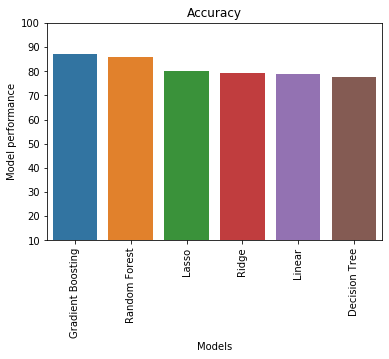

In [71]:
#Model performance
ss.barplot(x=Final_Data['Model'], y=Final_Data['Accuracy'])
pic.xticks(rotation='90')
pic.xlabel('Models')
pic.ylabel('Model performance')
pic.ylim(10,100)
pic.title('Accuracy');

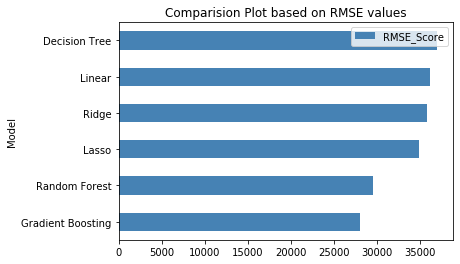

In [72]:
Final_Data.plot(x= 'Model', y='RMSE_Score', kind='barh',color='steelblue').set(title = "Comparision Plot based on RMSE values");

In [73]:
#From the above analysis, we can conclude that Gradient boosting model is best to predict house price
#Submission of Predicted House Prices for Test Data
gb_model.fit(X,y)
gb_predictions = gb_model.predict(new_test)
test_ID = HousingPrice_Test['Id']
results = pd.DataFrame({'Id': test_ID,
                       'SalePrice': gb_predictions})
results.to_csv('Predicted_HousePrice.csv', index=False);

In [74]:
results.head()

,Id,SalePrice
0,1461,123084.379495
1,1462,154516.095383
2,1463,184926.317000
3,1464,191960.777703
4,1465,191244.511219
